In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def preprocess(set):
  set = set.reshape(-1, 28, 28, 1)
  set = set / 255.0

  return set

In [3]:
mnist = tf.keras.datasets.fashion_mnist
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

classNames = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print(trainImages.shape, len(trainLabels), testImages.shape, len(testLabels))

(60000, 28, 28) 60000 (10000, 28, 28) 10000


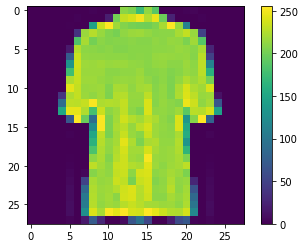

In [5]:
plt.figure()
plt.imshow(trainImages[random.randint(0,59999)])
plt.grid(False)
plt.colorbar()
plt.show()

In [6]:
trainImages = preprocess(trainImages)
testImages = preprocess(testImages)

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(trainImages, trainLabels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6234 - accuracy: 0.7823
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3818 - accuracy: 0.8625
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3389 - accuracy: 0.8763
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3127 - accuracy: 0.8859
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8907
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2784 - accuracy: 0.8979
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9028
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2502 - accuracy: 0.9078
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2454 - accuracy: 0.9072
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

In [9]:
loss, acc = model.evaluate(testImages,  testLabels, verbose=2)

313/313 - 0s - loss: 0.3522 - accuracy: 0.8894


# Prediction

In [10]:
prediction_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = prediction_model.predict(testImages)

i = random.randint(0,9999)
print(np.argmax(predictions[i]), testLabels[i])
predictions[i]

0 0


array([9.9868661e-01, 2.7364553e-13, 2.4869871e-07, 4.0783977e-08,
       2.0841802e-10, 2.7560006e-15, 1.3131975e-03, 3.9635657e-26,
       4.8772708e-10, 1.6063211e-17], dtype=float32)

In [11]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow( tf.squeeze(img), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classNames[predicted_label],
                                100*np.max(predictions_array),
                                classNames[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

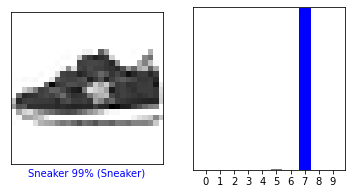

0 :  T-shirt/top
1 :  Trouser
2 :  Pullover
3 :  Dress
4 :  Coat
5 :  Sandal
6 :  Shirt
7 :  Sneaker
8 :  Bag
9 :  Ankle boot


In [12]:
i = random.randint(0,9999)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], testLabels, testImages)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  testLabels)
plt.show()

for j in range(10):
  print(j, ": ", classNames[j])